## Data Preperation

In [20]:
import time
import numpy as np
import imgaug as ia
import tensorflow as tf
import matplotlib as mp

from matplotlib import pyplot as pp
from tensorflow import keras as kr

In [21]:
DATASET_ROOT = './dataset/'
TRAIN_FOLDER = 'train'
VALIDATION_FOLDER = 'validation'
TEST_FOLDER = 'test'

In [22]:
start_time = time.time()

#### Custom Functions

In [23]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second image.
sometimes = lambda aug: ia.augmenters.Sometimes(0.5, aug)

# Augment training set
seq = ia.augmenters.Sequential([
    # crop images from each side by 0 to 16px (randomly chosen)
    ia.augmenters.Crop(px=(0, 16)),
    # horizontally flip 50% of the images
    ia.augmenters.Fliplr(0.5),
    # vertically flip 20% of all image
    ia.augmenters.Flipud(0.2),
])

def augment(img):
    seq_det = seq.to_deterministic()
    aug_image = seq_det.augment_image(img)

    return kr.applications.vgg16.preprocess_input(aug_image)

In [24]:
# Tool to display data set and its labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
	if type(ims[0]) is np.ndarray:
		ims = np.array(ims).astype(np.uint8)
		if (ims.shape[-1] != 3):
			ims = ims.transpose((0,2,3,1))
	f = pp.figure(figsize=figsize)
	cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
	for i in range(len(ims)):
		sp = f.add_subplot(rows, cols, i+1)
		sp.axis('Off')
		if titles is not None:
			sp.set_title(titles[i], fontsize=16)
		pp.imshow(ims[i], interpolation=None if interp else 'none')

#### Loading Existing Dataset & Perform Data Augmentation

In [25]:
# Shortcut
IDG = kr.preprocessing.image.ImageDataGenerator

# No augmentation
generator = IDG()

# Augmentation
agumented_generator = IDG(preprocessing_function=augment)

# Iterator for training data set
train_set = generator.flow_from_directory(
    DATASET_ROOT + TRAIN_FOLDER, 
    target_size=(224,224), 
    batch_size=10
)

# Iterator for augmented training data set
augmented_train_set = agumented_generator.flow_from_directory(
    DATASET_ROOT + TRAIN_FOLDER, 
    target_size=(224,224), 
    batch_size=10
)

# Iterator for validation data set
validation_set = generator.flow_from_directory(
    DATASET_ROOT + VALIDATION_FOLDER, 
    target_size=(224,224), 
    batch_size=10
)

# Iterator for test data set
test_set = generator.flow_from_directory(
    DATASET_ROOT + TEST_FOLDER, 
    target_size=(224,224), 
    batch_size=20
);

Found 2411 images belonging to 2 classes.
Found 2411 images belonging to 2 classes.
Found 724 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


#### Displaying first 5 batches of: augmented_train_set

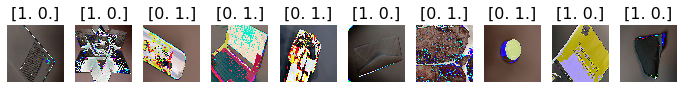

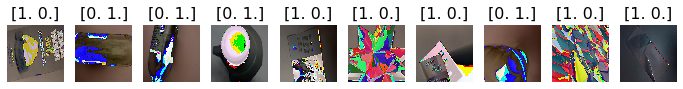

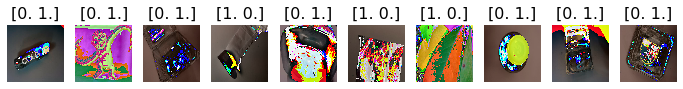

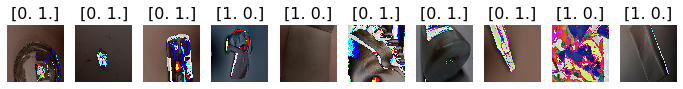

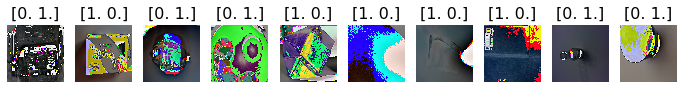

In [26]:
for i in range(5):
    imgs, labels = next(augmented_train_set)
    plots(imgs, titles=labels)

#### Displaying first 5 batches of: train_set

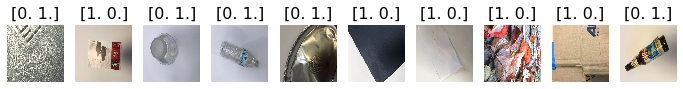

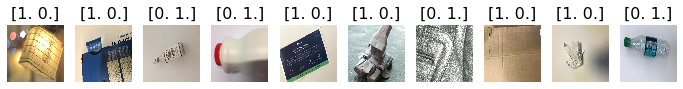

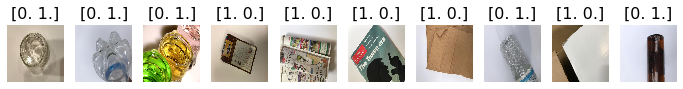

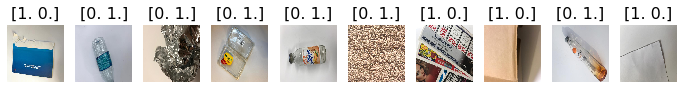

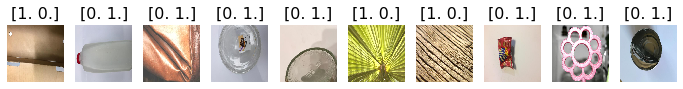

In [27]:
for i in range(5):
    imgs, labels = next(train_set)
    plots(imgs, titles=labels)

In [10]:
print("Data Augmentation & Dataset loading completed!\nTime taken: ", time.time() - start_time)

Data Augmentation & Dataset loading completed!
Time taken:  11.68743348121643
